### K- Means, Hirerarchial Clustering & PCA Analysis for HELP International - an international humanitarian NGO 

- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
- After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.
- Based on our clustering & PCA analysis we need to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Finally, suggest the countries which the CEO needs to focus on the most.

In [228]:
# Import all the necessary Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,10]
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import libraries for scaling
import sklearn 
from sklearn.preprocessing import StandardScaler


In [229]:
# Importing the datasets

df = pd.read_csv(r"D:\UpGrad\Machine Learning\UnSupervised Learning - Clustering\Assignment\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Data Prepartion 

In [230]:
# Check the statistical data i.e count, mean, median, varience for the dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [231]:
df.shape

(167, 10)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [233]:
# To Check whether the %age columns are true indicators of a country’s development, 
# we convert the columsn exports, imports & health which are experssed in percentage to absolute values

df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [234]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [235]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Checking for Outliers

In [236]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


- Checking the percentile 25%,50%,75%, 90%, 95%, 99% of the dataset to make decision on treating the outliers 

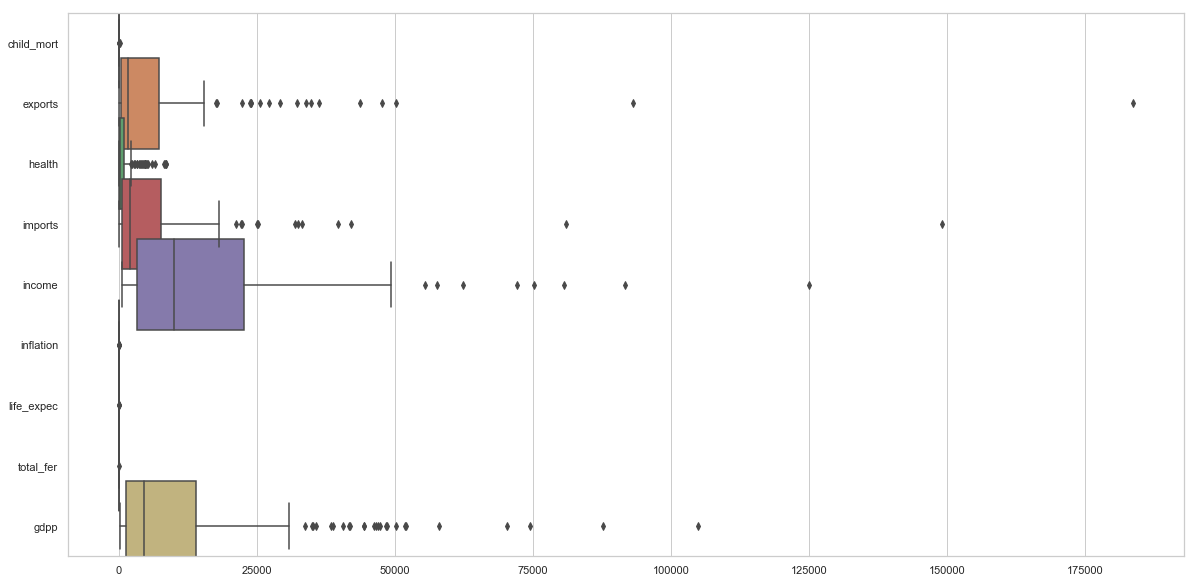

In [237]:
# Outliers for entire dataset to ensure we do not miss any other columns 
ax = sns.boxplot(data=df,orient = "h",saturation=0.75, width=1.5)

-- Based on the above boxplot we found the outliers for income, health,imports, gdpp

{'whiskers': [<matplotlib.lines.Line2D at 0x2432c06a7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x24329895da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2432c06a588>],
 'medians': [<matplotlib.lines.Line2D at 0x24329895400>],
 'fliers': [<matplotlib.lines.Line2D at 0x24329895860>],
 'means': []}

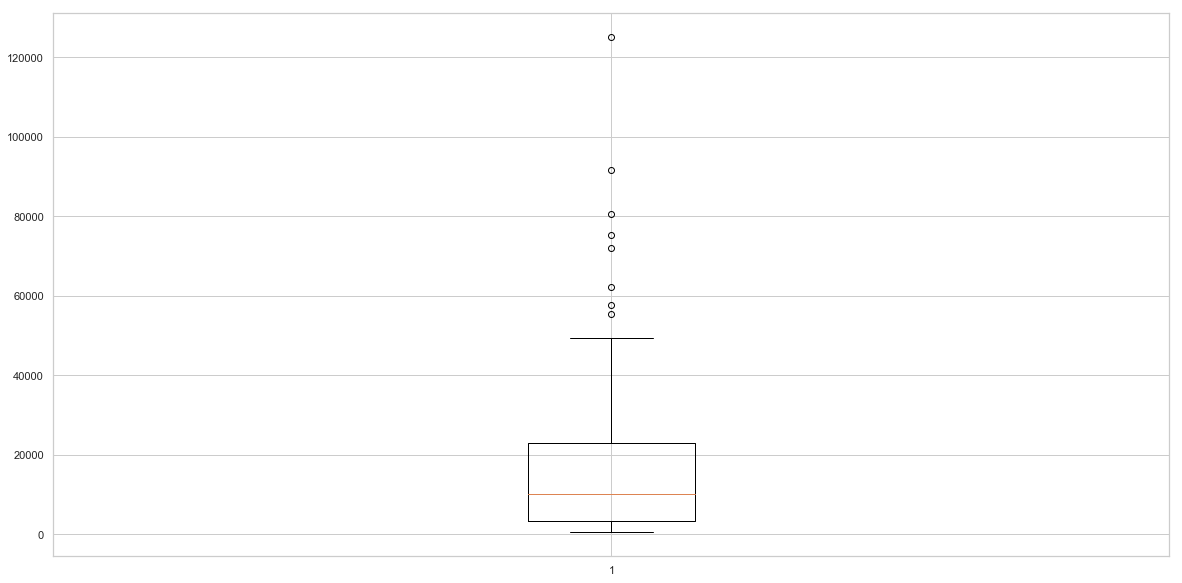

In [238]:
# Income outlier 
plt.boxplot(df['income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2432c510710>,
 'caps': [<matplotlib.lines.Line2D at 0x2432c5104a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2432c5109e8>],
 'medians': [<matplotlib.lines.Line2D at 0x2432be38e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2432be387b8>],
 'means': []}

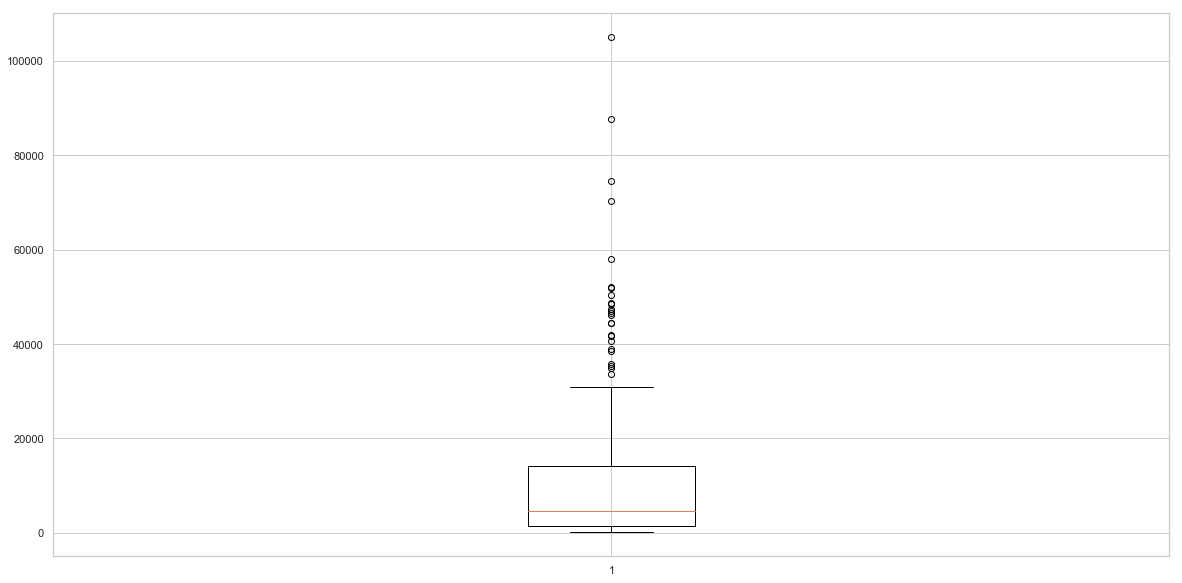

In [239]:
# outlier for gdpp
plt.boxplot(df['gdpp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2432c153668>,
 'caps': [<matplotlib.lines.Line2D at 0x2432be49828>,
 'boxes': [<matplotlib.lines.Line2D at 0x2432be49320>],
 'medians': [<matplotlib.lines.Line2D at 0x2432bd09518>],
 'fliers': [<matplotlib.lines.Line2D at 0x243291f7f28>],
 'means': []}

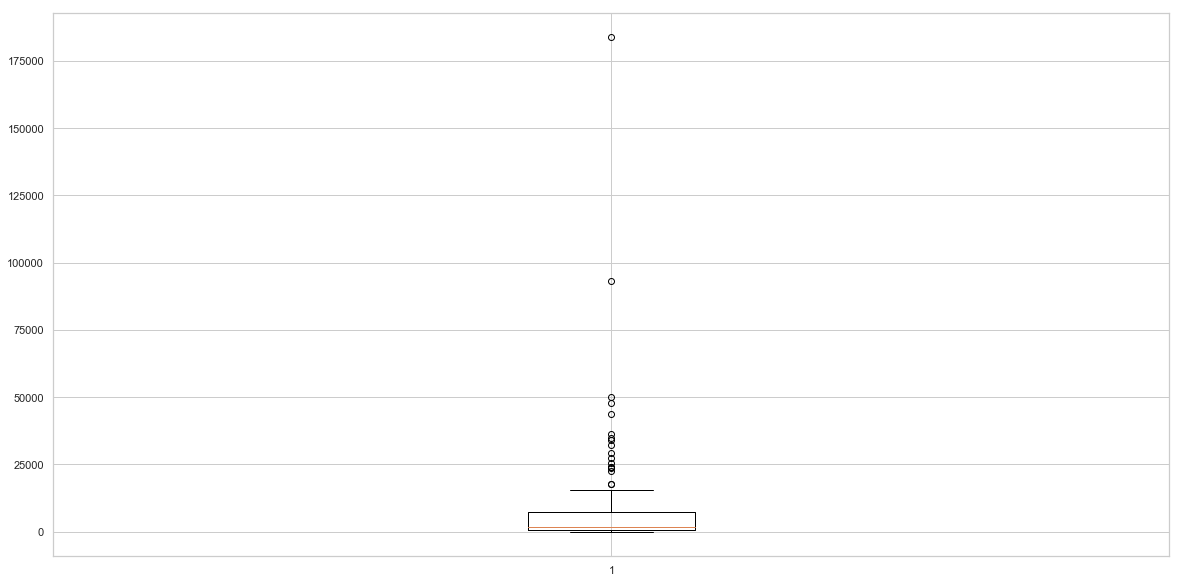

In [240]:
# outlier for gdpp
plt.boxplot(df['exports'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2432cfba828>,
 'caps': [<matplotlib.lines.Line2D at 0x2432dd29d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x2432cfbacf8>],
 'medians': [<matplotlib.lines.Line2D at 0x2432dd298d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2432d971400>],
 'means': []}

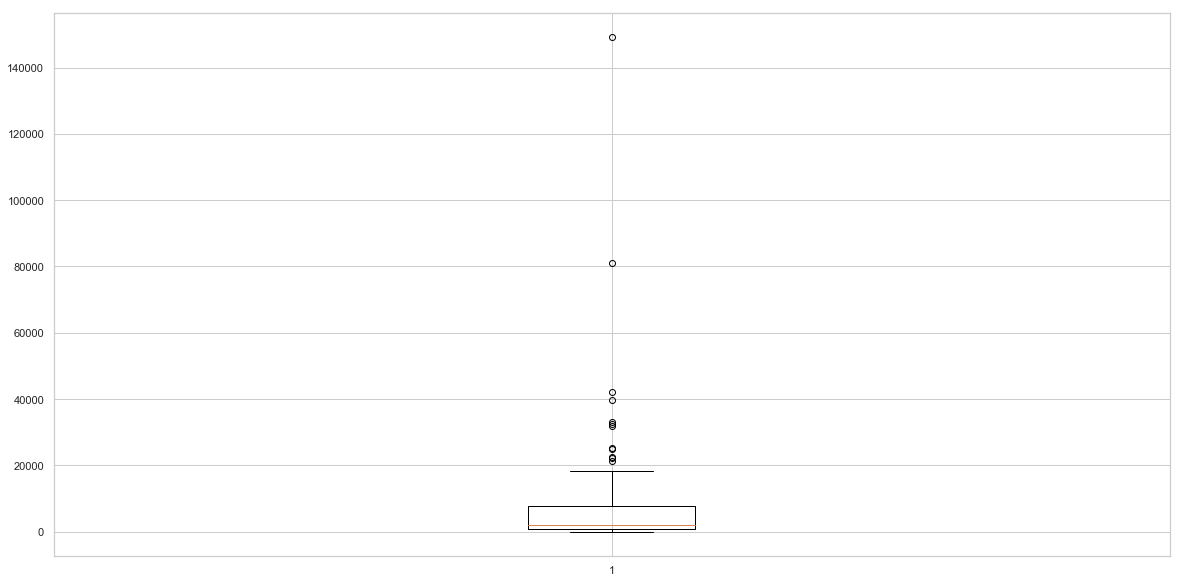

In [241]:
# outlier for gdpp
plt.boxplot(df['imports'])

In [242]:
# removing (statistical) outliers
Q1 = df.exports.quantile(0.05)
Q3 = df.exports.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.health >= Q1 - 1.5*IQR) & (df.health <= Q3 + 1.5*IQR)]

# outlier treatment for income
Q1 = df.income.quantile(0.05)
Q3 = df.income.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.income >= Q1 - 1.5*IQR) & (df.income <= Q3 + 1.5*IQR)]

# outlier treatment for gdpp
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.gdpp >= Q1 - 1.5*IQR) & (df.gdpp <= Q3 + 1.5*IQR)]

Q1 = df.imports.quantile(0.05)
Q3 = df.imports.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.imports >= Q1 - 1.5*IQR) & (df.imports <= Q3 + 1.5*IQR)]


* Since the count of the data is 167 if we remove the outliers data we'll have less data for analysis so we will not treat those for now

### Checking for Missing Values and Inputing them if required

In [243]:
round(100*(df.isnull().sum()/len(df.index)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- Since there are no missing values we are good to proceed with the next step of scaling the data

In [244]:
# Check the data count for each country

df['country'].value_counts()

Angola                   1
Canada                   1
Bangladesh               1
Cambodia                 1
Philippines              1
Iran                     1
Tonga                    1
Antigua and Barbuda      1
Benin                    1
Guyana                   1
Algeria                  1
Morocco                  1
Moldova                  1
Albania                  1
Cyprus                   1
Ireland                  1
Mongolia                 1
Togo                     1
Solomon Islands          1
Cote d'Ivoire            1
Netherlands              1
Congo, Rep.              1
Kenya                    1
Japan                    1
El Salvador              1
Montenegro               1
Venezuela                1
Suriname                 1
Afghanistan              1
Azerbaijan               1
                        ..
Brunei                   1
Timor-Leste              1
Kyrgyz Republic          1
Mauritania               1
Romania                  1
Croatia                  1
C

- We have unique 167 records means 1 row / country so no duplicates 

### Scaling of data

In [245]:
# Creating a new dataframe for scaling and further analysis
df_1 = df.copy()
df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [246]:
# We move country column which is a non-integer to y dataframe before scaling the numerical variables
y = df_1.pop('country')
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [247]:
X = df_1.copy()

In [248]:
# Use standard scaler for scaling the numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [249]:
x = scaler.fit_transform(X)

In [250]:
x[:5,:5]

array([[ 1.27294122, -0.61550829, -0.56011879, -0.64605227, -0.88946583],
       [-0.55267214, -0.49453307, -0.42900649, -0.41925653, -0.36414607],
       [-0.28726367, -0.43154914, -0.47653244, -0.49583112, -0.17662206],
       [ 1.98731167, -0.37754373, -0.52606822, -0.48097646, -0.61859783],
       [-0.70894067, -0.00550411, -0.15760903,  0.25848795,  0.21484219]])

## Applying PCA on dataset

In [251]:
from sklearn.decomposition import PCA

In [252]:
pca = PCA(svd_solver='randomized',random_state =42)

In [253]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [254]:
pca.components_

array([[-3.09694412e-01,  3.63807591e-01,  3.56805351e-01,
         3.69125066e-01,  3.75217860e-01, -1.38914641e-01,
         3.35854710e-01, -2.94122888e-01,  3.85717067e-01],
       [ 4.99243729e-01,  3.16856639e-01,  2.59282755e-01,
         2.70815668e-01,  1.36707090e-01,  2.27637876e-01,
        -3.68771647e-01,  4.91708475e-01,  2.48014745e-01],
       [-1.52857736e-01, -8.62408494e-03, -8.56252995e-02,
        -7.40310043e-02,  1.49701243e-01,  9.46341333e-01,
         1.97138878e-01, -8.30250049e-02, -4.31119957e-03],
       [ 2.91108423e-02, -4.98322113e-01,  6.06824451e-01,
        -4.59729533e-01,  1.18987115e-02,  8.77133740e-04,
         1.53508329e-01,  1.60084166e-01,  3.49150938e-01],
       [ 2.19505359e-01, -9.32381296e-02,  3.39002880e-02,
        -1.83738618e-01,  3.22201482e-01,  3.50666377e-02,
        -5.82544693e-01, -6.73418558e-01,  1.01590359e-01],
       [ 6.56072120e-03, -1.63759152e-02, -4.08216919e-01,
        -3.14332657e-01,  7.60945975e-01, -1.765075

In [255]:
pca.explained_variance_ratio_

array([0.63814336, 0.16369442, 0.10001886, 0.03754606, 0.02540395,
       0.02259069, 0.00946654, 0.00186849, 0.00126763])

- Based on the above explained varience ratio we will chose the first 3 PCA components which forms >85% varience which is good

<BarContainer object of 9 artists>

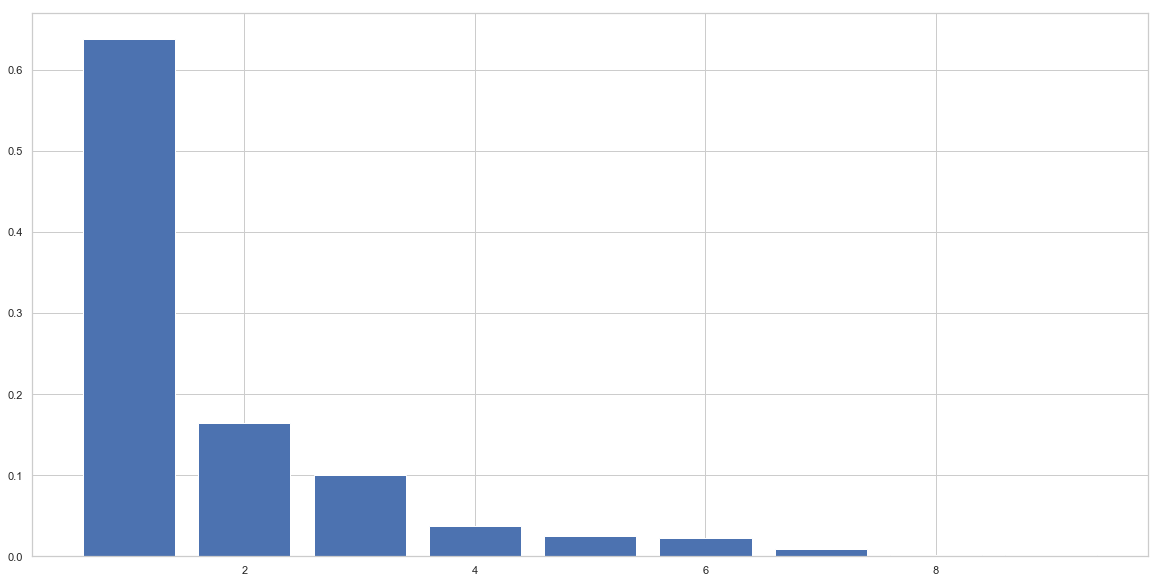

In [256]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [257]:
# find the cummulative sum of explained_variance_ratio


var_cumm = np.cumsum(pca.explained_variance_ratio_)


## Scree plot

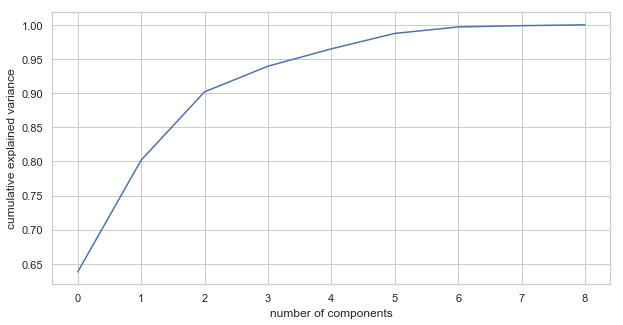

In [258]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,5))
plt.plot(var_cumm)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- PCA with 2 components
- Based on the above scree plot & the explained varience which comes out to 90% we can decide the PCA Components to be 2.

In [259]:
# Lets go ahead with the dimensionality reduction using incremental PCA
from sklearn.decomposition import IncrementalPCA
pca2 = pca2 = IncrementalPCA(n_components = 2)


In [260]:
df_pca = pca2.fit_transform(x)

In [261]:
df_pca.shape

(164, 2)

In [262]:
#Creating a transpose to covert cols to rows
df1_pca = np.transpose(df_pca)

In [263]:
# We see 3 PCA components as 3 columns
df1_pca

array([[-2.774927  , -0.11226217, -0.51916604, -2.74688652,  0.83757842,
         0.025076  , -0.45615332,  3.7508202 ,  4.96320186, -0.48602933,
         1.9593755 ,  2.04244312, -1.19208762,  1.05835094,  0.02408364,
         5.56982929, -0.45028778, -2.50848164, -0.82552712, -1.14793267,
         0.17203279, -1.10161908,  0.10563164,  3.64444865,  0.30600591,
        -2.89071111, -2.90588489, -1.33984668, -2.57291472,  4.12798093,
        -0.62371426, -3.37662404, -3.30082306,  0.79477634, -0.23951158,
        -0.11660559, -2.10172583, -3.24194239, -2.09258961,  0.42094526,
        -2.69006542,  0.97791115,  3.06906973,  2.20247183,  5.74716287,
        -0.44036209, -0.39138436, -0.95431638, -0.45687902, -0.46394781,
        -2.10853168,  1.45601971, -0.81905414,  4.07108201,  3.45105193,
        -1.22141766, -2.25505437, -0.47073875,  4.1171091 , -2.12896462,
         2.22768745, -0.10491192, -0.97685432, -2.8454434 , -2.75469007,
        -1.00257791, -4.05402173,  1.43173567,  4.0

In [264]:
df1 = pd.DataFrame({'PC1':df1_pca[0],'PC2': df1_pca[1]})

In [265]:
df1.head()

,PC1,PC2
0,-2.774927,1.388562
1,-0.112262,-1.574833
2,-0.519166,-0.809716
3,-2.746887,2.153208
4,0.837578,-0.967227


In [266]:
df1_final = pd.concat([df1,y],axis = 1 )

In [267]:
df1_final.head()

,PC1,PC2,country
0,-2.774927,1.388562,Afghanistan
1,-0.112262,-1.574833,Albania
2,-0.519166,-0.809716,Algeria
3,-2.746887,2.153208,Angola
4,0.837578,-0.967227,Antigua and Barbuda


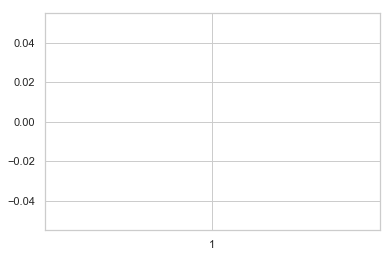

In [268]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering

# For PC1
plt.boxplot(df1_final.PC1)
Q1 = df1_final.PC1.quantile(0.05)
Q3 = df1_final.PC1.quantile(0.95)
df1_final = df1_final[(df1_final.PC1 >= Q1) & (df1_final.PC1 <= Q3)]


- The above boxplot indicates there is no outliers for the PC1 Component

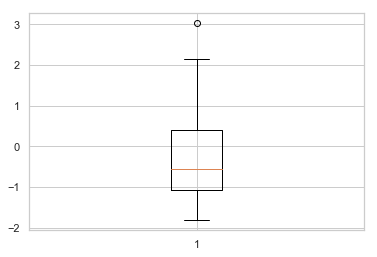

In [269]:
# For PC2
plt.boxplot(df1_final.PC2)
Q1 = df1_final.PC2.quantile(0.05)
Q3 = df1_final.PC2.quantile(0.95)
df1_final = df1_final[(df1_final.PC2 >= Q1) & (df1_final.PC2 <= Q3)]

No handles with labels found to put in legend.


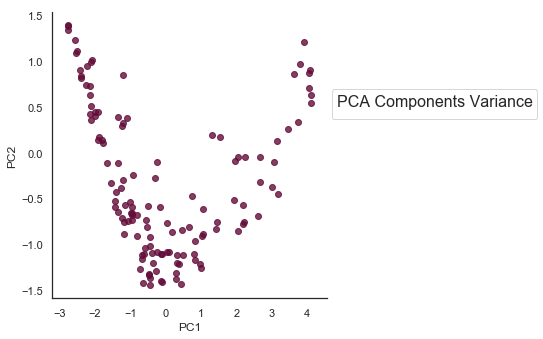

In [270]:
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
# sns.palplot(customPalette)

# Plot the PCA components with the Cluster ids to ensure Cohesion & separation is fulfuiled 
facet = sns.lmplot(data=df1_final, x='PC1', y='PC2', 
                   fit_reg=False, legend=True)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="PCA Components Variance", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])
 

# Find the correlation of the datasets

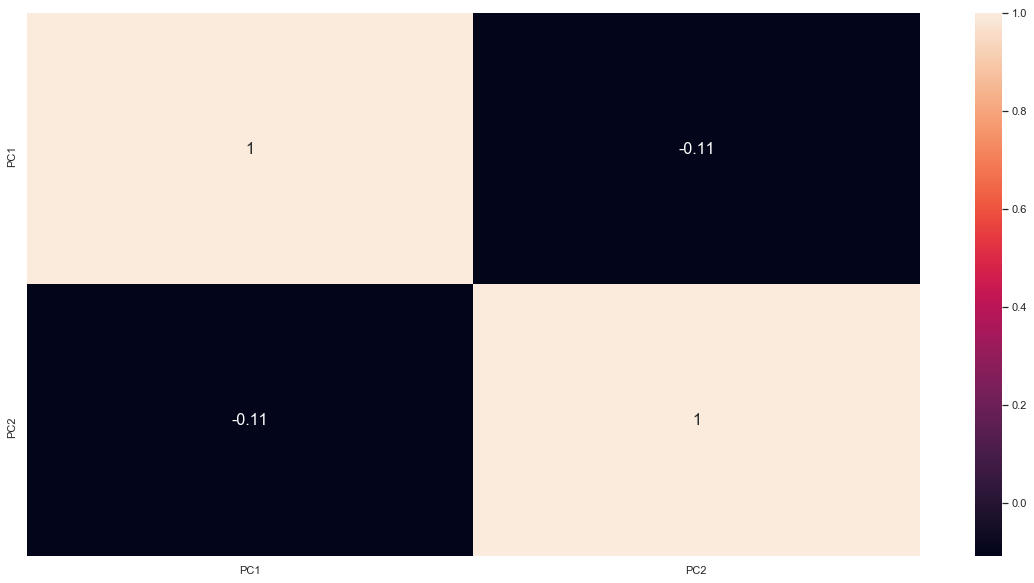

In [271]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df1_final.corr(),annot = True)

- Based on the above correlation matrix it is obvious that there isnt multicollinearity in the PCA components 

### Clustering

In [272]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [273]:
#Let's check the Hopkins measure
hopkins(df1_final.drop(['country'],axis=1))

0.8454758887577044

- As per Hopkins statistics we get 78% of variance so we are good to proceed with clustering

In [274]:
# Create new dataframe without country column for clustering.

df_kmeans = df1_final.copy()
df_kmeans.head()

,PC1,PC2,country
0,-2.774927,1.388562,Afghanistan
2,-0.519166,-0.809716,Algeria
4,0.837578,-0.967227,Antigua and Barbuda
5,0.025076,-0.763255,Argentina
6,-0.456153,-1.446532,Armenia


In [275]:
# Remove the country column from the df_kmeans before proceeding with clustering.

df_kmeans = df_kmeans.drop('country',axis=1)
df_kmeans.head()

,PC1,PC2
0,-2.774927,1.388562
2,-0.519166,-0.809716
4,0.837578,-0.967227
5,0.025076,-0.763255
6,-0.456153,-1.446532


## Modelling - K - Means Clustering


In [276]:
# import necessary libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Finding the optimal number of Clusters

SSD

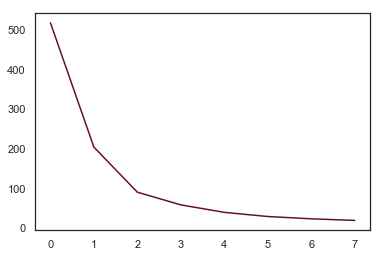

In [277]:
# elbow-curve / SSD (SUM OF SQUARED DISTANCES)

ssd = []
range_n_clusters = [1,2,3,4,5,6,7,8]

for n in range_n_clusters:
    kmeans = KMeans(n_clusters = n, max_iter = 50)
    kmeans.fit(df_kmeans)
    
    ssd.append(kmeans.inertia_)

    
    # plot the SSD's for each n clusters

plt.plot(ssd)

- Based on the plot above the optimum clusters is 3 which we will double check with the Silhoutte Analysis

## Silhoutte Analysis

In [278]:
# silhoutte analysis

range_n_clusters  = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # initalise kmeans
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(df_kmeans)
    
    cluster_labels = kmeans.labels_
    
    # silohutte score
    
    silhouette_avg = silhouette_score(df_kmeans, cluster_labels)
    print("For n_clusters={0}, the silouhtte score is {1} ".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silouhtte score is 0.5495818306934841 
For n_clusters=3, the silouhtte score is 0.5412843661574991 
For n_clusters=4, the silouhtte score is 0.5146557630924137 
For n_clusters=5, the silouhtte score is 0.4982751750623213 
For n_clusters=6, the silouhtte score is 0.4879706742179057 
For n_clusters=7, the silouhtte score is 0.47657083513940285 
For n_clusters=8, the silouhtte score is 0.46105493855522456 


- The silhouette scores for n_clusters = 3 gives an optimum value of 54% so we will go ahead with 3 clusters.

In [279]:
# Perform K-means using final value K=3
K_mean = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
K_mean.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [280]:
df1_final.head()

,PC1,PC2,country
0,-2.774927,1.388562,Afghanistan
2,-0.519166,-0.809716,Algeria
4,0.837578,-0.967227,Antigua and Barbuda
5,0.025076,-0.763255,Argentina
6,-0.456153,-1.446532,Armenia


In [281]:
# Add the cluster Ids to the PCA components 

df_km = pd.concat([df1_final.reset_index().drop('index', axis = 1), pd.Series(K_mean.labels_).reset_index().drop('index', axis = 1)], axis=1)
df_km.columns = ['PC1','PC2', 'country','ClusterID']
df_km.head()

,PC1,PC2,country,ClusterID
0,-2.774927,1.388562,Afghanistan,2
1,-0.519166,-0.809716,Algeria,0
2,0.837578,-0.967227,Antigua and Barbuda,0
3,0.025076,-0.763255,Argentina,0
4,-0.456153,-1.446532,Armenia,0


In [282]:
# Check the count of observation per cluster
df_km['ClusterID'].value_counts()

0    64
2    38
1    28
Name: ClusterID, dtype: int64

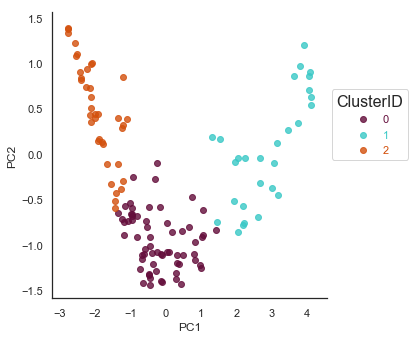

In [283]:
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
# sns.palplot(customPalette)

# Plot the PCA components with the Cluster ids to ensure Cohesion & separation is fulfuiled 
facet = sns.lmplot(data=df_km, x='PC1', y='PC2', hue='ClusterID', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="ClusterID", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])
 

- The above plot shows the varience of PCA components PC1 & PC2 assinged to each cluster id', which shows a very good cohesion & seperation between each clusters.

## Cluster Profiling

In [284]:
# Merge the original dataframe with the ClusterID's

df_clust = pd.merge(df, df_km, how = 'inner', on= 'country')
df_clust.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.774927,1.388562,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.519166,-0.809716,0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.837578,-0.967227,0
3,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0.025076,-0.763255,0
4,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.456153,-1.446532,0


In [285]:
# Drop the PCA components from the data set

df_clust = df_clust.drop(['PC1','PC2'],axis=1)
df_clust.head()



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
3,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0
4,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,0


In [286]:
df_clust.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
3,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0
4,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,0


- Clustering of the datapoints is done and each country has been assinged with cluster ids

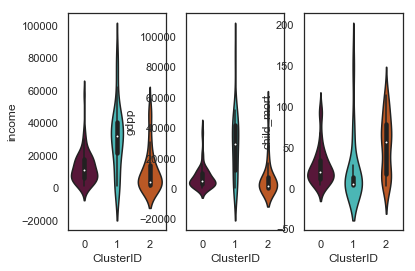

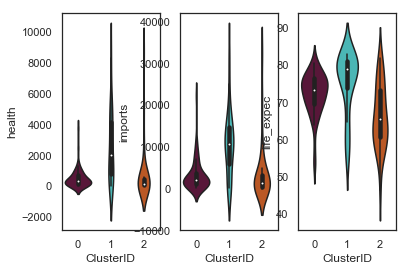

In [287]:
f, axes = plt.subplots(1, 3)
sns.violinplot(ax = axes[0], data = df_clust, x='ClusterID',y='income') 
sns.violinplot(ax = axes[1], data = df_clust, x='ClusterID',y='gdpp') 
sns.violinplot(ax = axes[2], data = df_clust, x='ClusterID',y='child_mort')

f, axes = plt.subplots(1, 3)
sns.violinplot(ax = axes[0], data = df_clust, x='ClusterID',y='health') 
sns.violinplot(ax = axes[1], data = df_clust, x='ClusterID',y='imports')
sns.violinplot(ax = axes[2], data = df_clust, x='ClusterID',y='life_expec')

## Analysis of the K- Mean clusters

In [288]:
# As per the task, we need to profile the clusters based on income, gdpp, child_mort. So we will find the centroid/mean of those columns for clustering

clust_income = pd.DataFrame(df_clust.groupby(["ClusterID"]).income.mean())
clust_gdpp = pd.DataFrame(df_clust.groupby(["ClusterID"]).gdpp.mean())
clust_child = pd.DataFrame(df_clust.groupby(["ClusterID"]).child_mort.mean())


In [289]:
# Concatenate the resultant with the Cluster ID columns
df_clust1 = pd.concat([pd.Series([0,1,2]),clust_income,clust_gdpp,clust_child], axis=1)

In [290]:
# Add column name to the grouped cluster
df_clust1.columns = ["ClusterID","income","gdpp","child_mort"]
df_clust1

,ClusterID,income,gdpp,child_mort
0,0,12777.301587,7286.523810,26.855556
1,1,31050.000000,28149.821429,23.510714
2,2,10815.081081,7366.810811,51.870270


#####  Based on the centroids/means and the observations from the clusters above we will now group which countries fall under low, developing & developed countries and which requires financial aid.

In [291]:
# Grouping the dataset based on the above mean values, for under developed countries

under_devp = df[df['child_mort'] >= 50]
under_devp = under_devp[under_devp['income'] <= 10500]

# Developing countries

Developing  = df[df['child_mort'] <= 27]
Developing = Developing[Developing['income'] <= 13000]

# Developed Countries

Developed = df[df['child_mort'] <= 23]
Developed = Developed[Developed['income'] >= 32000]
Developed = Developed[Developed['gdpp'] >= 28000]

In [292]:
under_devp= under_devp.sort_values(by='child_mort',ascending=True)
under_devp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.50,69.6,3.51,738
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482
108,Namibia,56.0,2480.8200,351.8820,3150.330,8460,3.56,58.6,3.60,5190
165,Yemen,56.3,393.0000,67.8580,450.640,4480,23.60,67.5,4.67,1310
69,India,58.8,305.1000,54.6750,365.850,4410,8.98,66.2,2.60,1350


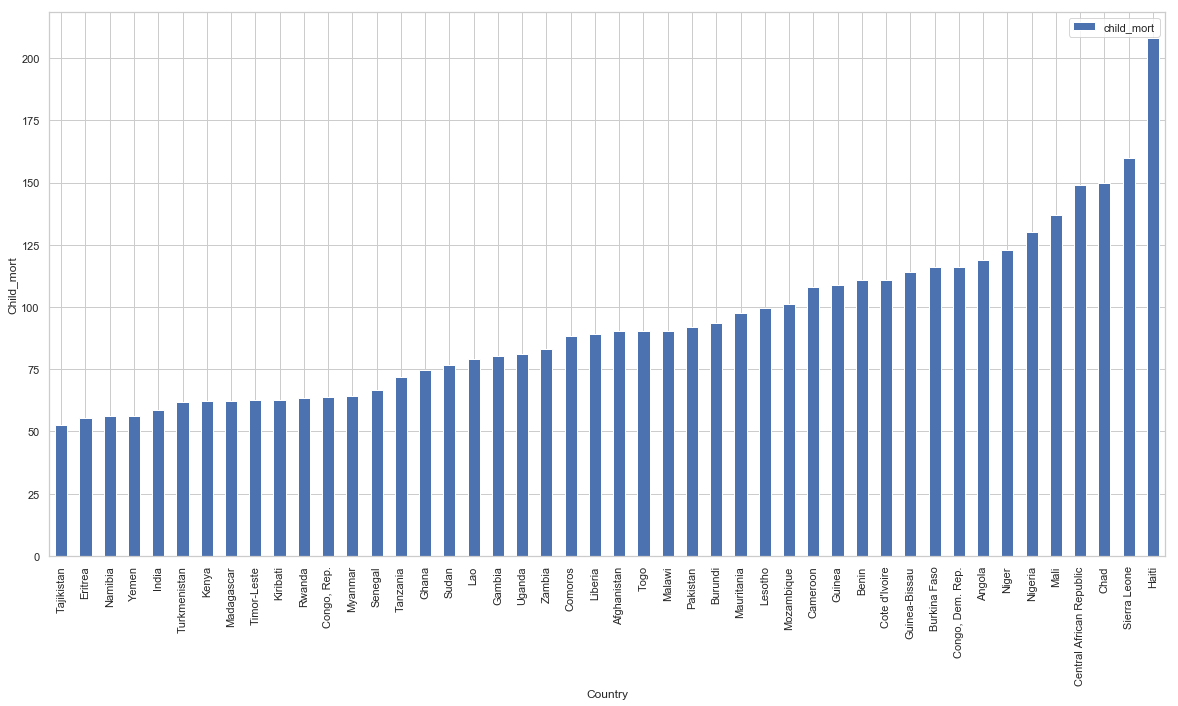

In [293]:
# Plot the under developed countries on the basis of child mort
plt.rcParams["figure.figsize"] = [20,10]
sns.set(style="whitegrid")
under_devp.plot(x="country", y="child_mort", kind ='bar',color = 'b')

plt.ylabel('Child_mort')
plt.xlabel('Country')
plt.show()

In [294]:
Developing = Developing.sort_values(by='income',ascending=True)
Developing.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
102,Moldova,17.2,638.96,190.710,1279.55,3910,11.100,69.7,1.27,1630
164,Vietnam,23.3,943.20,89.604,1050.62,4490,12.100,73.1,1.95,1310
151,Tonga,17.4,440.20,179.985,2140.65,4980,3.680,69.9,3.91,3550
127,Samoa,18.9,1007.40,223.215,1831.95,5400,1.720,71.5,4.34,3450
30,Cape Verde,26.5,1082.37,135.379,2045.58,5830,0.505,72.5,2.67,3310


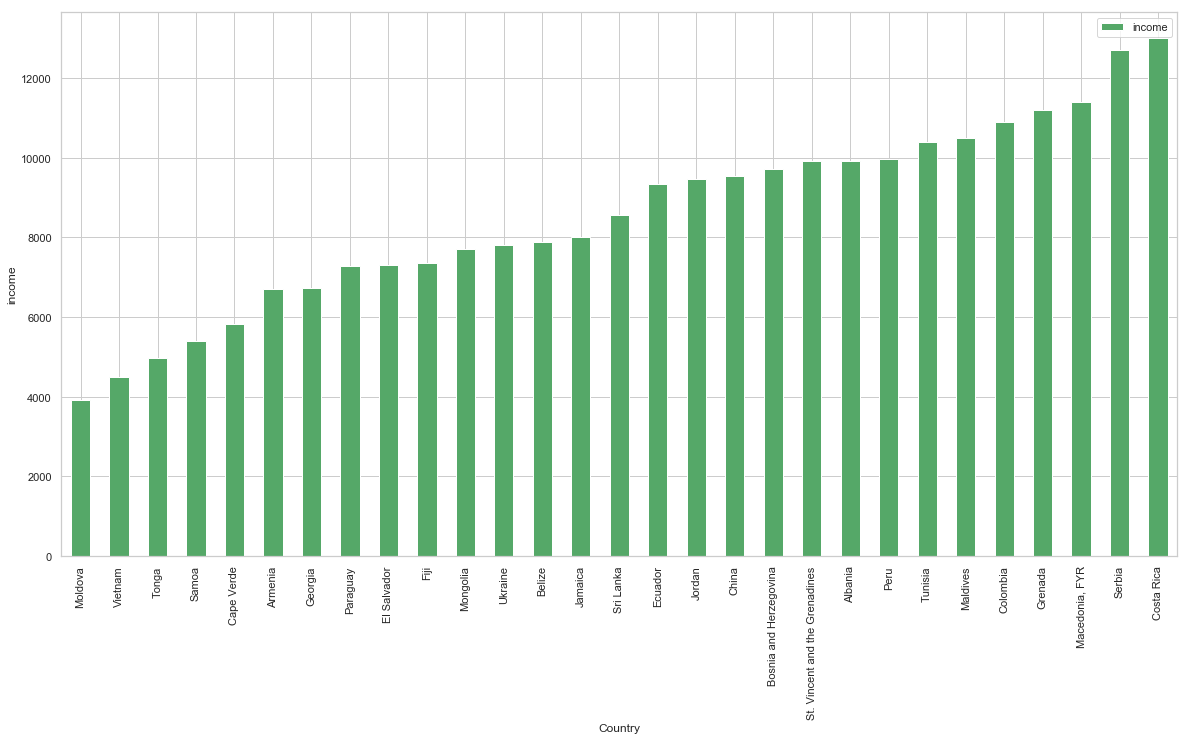

In [295]:
# Plot the under developed countries on the basis of child mort
plt.rcParams["figure.figsize"] = [20,10]
sns.set(style="whitegrid")
Developing.plot(x="country", y="income", kind ='bar',color = 'g')

plt.ylabel('income')
plt.xlabel('Country')
plt.show()

In [296]:
Developed = Developed.sort_values(by='gdpp',ascending=True)
Developed.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
139,Spain,3.8,7828.5,2928.78,8227.6,32500,0.16,81.9,1.37,30700
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.01,79.9,1.42,30800
111,New Zealand,6.2,10211.1,3403.70,9436.0,32300,3.73,80.9,2.17,33700
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600,12.50,76.5,1.87,35000
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.70,77.1,1.84,35300


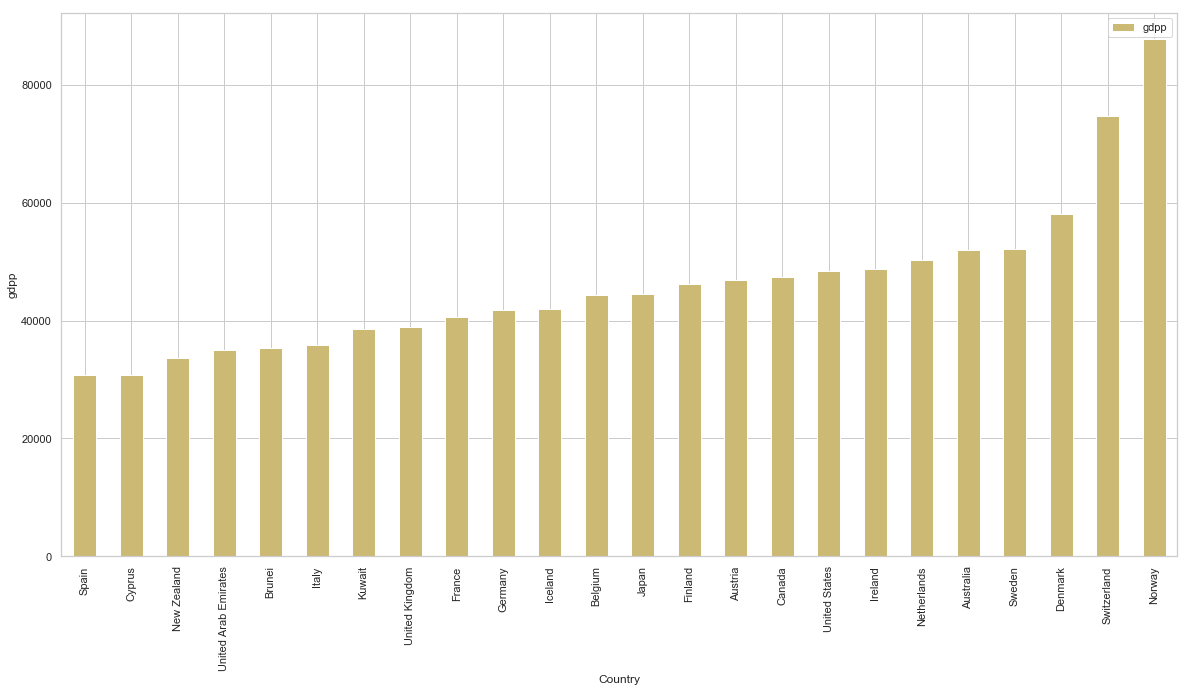

In [297]:
# Plot the under developed countries on the basis of child mort
plt.rcParams["figure.figsize"] = [20,10]
sns.set(style="whitegrid")
Developed.plot(x="country", y="gdpp", kind ='bar',color = 'Y')

plt.ylabel('gdpp')
plt.xlabel('Country')
plt.show()

In [298]:
under_developed_countries = under_devp.country
Developed_countries = Developed.country
Developing_countries = Developing.country

In [299]:
under_developed_countries.count()# There are 33 countries which are in direct need in aid.




46

In [300]:
#lIST OF Underdeveloped Countries
print(under_developed_countries.to_string(index=False))

               Tajikistan
                  Eritrea
                  Namibia
                    Yemen
                    India
             Turkmenistan
                    Kenya
               Madagascar
              Timor-Leste
                 Kiribati
                   Rwanda
              Congo, Rep.
                  Myanmar
                  Senegal
                 Tanzania
                    Ghana
                    Sudan
                      Lao
                   Gambia
                   Uganda
                   Zambia
                  Comoros
                  Liberia
              Afghanistan
                     Togo
                   Malawi
                 Pakistan
                  Burundi
               Mauritania
                  Lesotho
               Mozambique
                 Cameroon
                   Guinea
                    Benin
            Cote d'Ivoire
            Guinea-Bissau
             Burkina Faso
         Congo, Dem. Rep.
            

In [301]:
Developed_countries.count() # There are 24 countries which are developed and does not require immediate aid.

24

In [302]:
print(Developed_countries.to_string(index=False))

                Spain
               Cyprus
          New Zealand
 United Arab Emirates
               Brunei
                Italy
               Kuwait
       United Kingdom
               France
              Germany
              Iceland
              Belgium
                Japan
              Finland
              Austria
               Canada
        United States
              Ireland
          Netherlands
            Australia
               Sweden
              Denmark
          Switzerland
               Norway


In [303]:
Developing_countries.count() # There are 19 countries which is developing may require aid in future for their developement.

29

In [304]:
print(Developing_countries.to_string(index=False))

                        Moldova
                        Vietnam
                          Tonga
                          Samoa
                     Cape Verde
                        Armenia
                        Georgia
                       Paraguay
                    El Salvador
                           Fiji
                       Mongolia
                        Ukraine
                         Belize
                        Jamaica
                      Sri Lanka
                        Ecuador
                         Jordan
                          China
         Bosnia and Herzegovina
 St. Vincent and the Grenadines
                        Albania
                           Peru
                        Tunisia
                       Maldives
                       Colombia
                        Grenada
                 Macedonia, FYR
                         Serbia
                     Costa Rica


## Hirerechial Clustering

In [305]:
df1_final.head()



,PC1,PC2,country
0,-2.774927,1.388562,Afghanistan
2,-0.519166,-0.809716,Algeria
4,0.837578,-0.967227,Antigua and Barbuda
5,0.025076,-0.763255,Argentina
6,-0.456153,-1.446532,Armenia


In [306]:
# Import necessary libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [307]:
df_hirc = df1_final.drop('country',axis=1)
df_hirc.head()

,PC1,PC2
0,-2.774927,1.388562
2,-0.519166,-0.809716
4,0.837578,-0.967227
5,0.025076,-0.763255
6,-0.456153,-1.446532


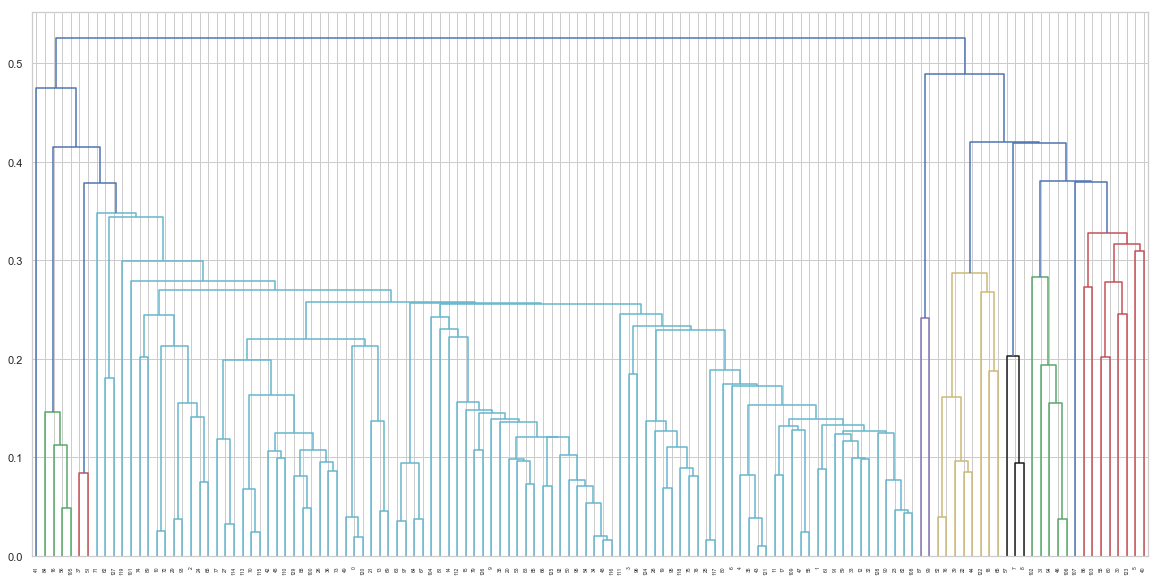

In [308]:
# Single Linkage

mergings  = linkage(df_hirc, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()


- From the above dendrogram we cut the clusters into 2


In [309]:
# For single linkage we will cut the clusters as 2.

cluster_labels = cut_tree(mergings,n_clusters=2).reshape(-1,)

In [310]:
cluster_labels

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [311]:
# assign the cluster labels to the final dataframe

df_hirc['cluster_labels'] = cluster_labels
df_hirc.head()

,PC1,PC2,cluster_labels
0,-2.774927,1.388562,0
2,-0.519166,-0.809716,0
4,0.837578,-0.967227,0
5,0.025076,-0.763255,0
6,-0.456153,-1.446532,0


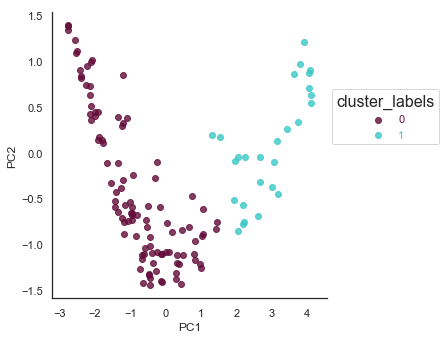

In [312]:
# Visualise the data for the PCA components using cluster labels
# sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',data=df_hirc)

plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
# sns.palplot(customPalette)

# Plot the PCA components with the Cluster ids to ensure Cohesion & separation is fulfuiled 
facet = sns.lmplot(data=df_hirc, x='PC1', y='PC2', hue='cluster_labels', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="cluster_labels", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])
 

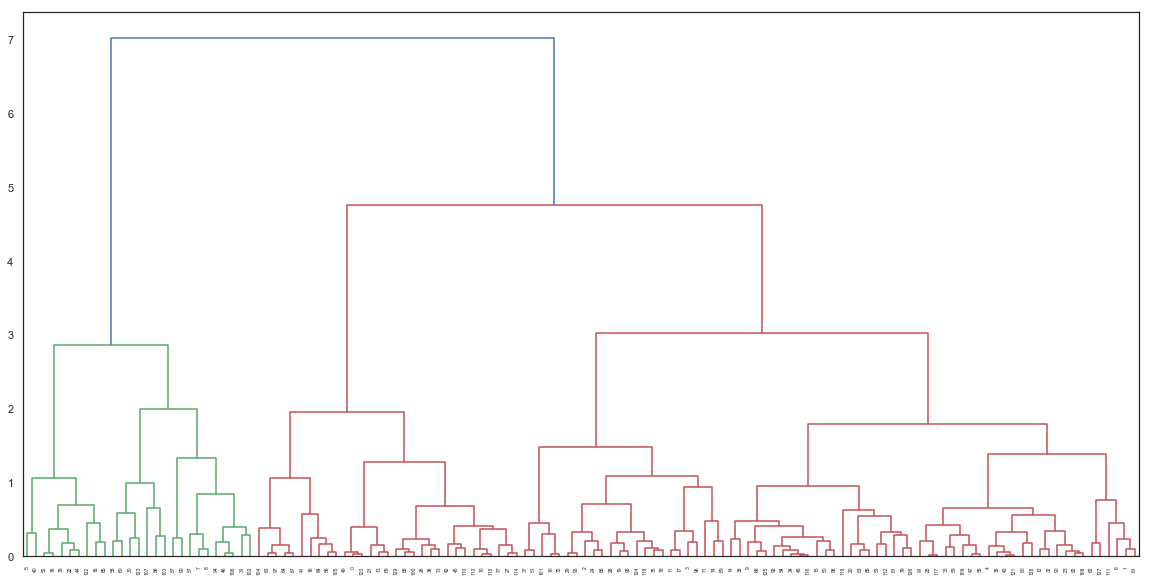

In [313]:
# complete linkage dendrogram 

comp_mergings  = linkage(df_hirc, method='complete', metric='euclidean')
dendrogram(comp_mergings)
plt.show()

In [314]:
# For complete linkage we will cut the clusters as 2.

cluster_labels_comp = cut_tree(comp_mergings,n_clusters=3).reshape(-1,)

In [315]:
cluster_labels_comp

array([0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0,
       2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0])

In [316]:
# Create a new dataframe for complete linkage

df_complete = df_hirc.copy()
df_complete = df_complete.drop('cluster_labels',axis=1)
df_complete.head()

,PC1,PC2
0,-2.774927,1.388562
2,-0.519166,-0.809716
4,0.837578,-0.967227
5,0.025076,-0.763255
6,-0.456153,-1.446532


In [317]:
# assign the cluster labels & country to the final dataframe
df_complete['cluster_labels'] = cluster_labels_comp
df_complete['country'] = df1_final['country']
df_complete.head()

,PC1,PC2,cluster_labels,country
0,-2.774927,1.388562,0,Afghanistan
2,-0.519166,-0.809716,1,Algeria
4,0.837578,-0.967227,1,Antigua and Barbuda
5,0.025076,-0.763255,1,Argentina
6,-0.456153,-1.446532,1,Armenia


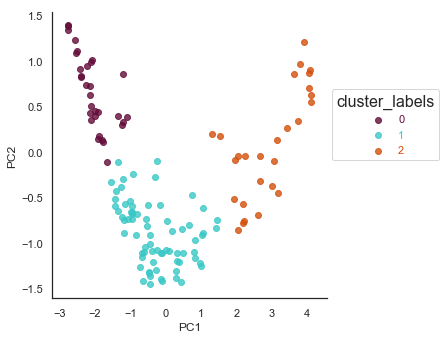

In [318]:
# Visualise the data for the PCA components using cluster labels
# sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',data=df_hirc)

plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
# sns.palplot(customPalette)

# Plot the PCA components with the Cluster ids to ensure Cohesion & separation is fulfuiled 
facet = sns.lmplot(data=df_complete, x='PC1', y='PC2', hue='cluster_labels', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="cluster_labels", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])
 

- Based on the above PCA components plot the clusters have good varience compared to single linkage. So we will proceed with complete linkage for further cluster profiling.

In [319]:
# Let's merge the original data with the data(cluster labels)
df_hk_final=pd.merge(df,df_complete, how = 'inner', on= 'country')
df_hk_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.774927,1.388562,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.519166,-0.809716,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.837578,-0.967227,1
3,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0.025076,-0.763255,1
4,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.456153,-1.446532,1


In [320]:
# drop the PCA omponents now

df_hk_final = df_hk_final.drop(['PC1','PC2'],axis = 1)
df_hk_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
3,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,1
4,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1


#### So we have performed the clustering using the PCA and have now allocated the CLUSTER LABELS back to each of the datapoints

## Analysis 

In [321]:
# Check the count of observation per cluster
df_hk_final['cluster_labels'].value_counts()

1    71
0    30
2    27
Name: cluster_labels, dtype: int64

In [322]:
# As per the task, we need to profile the clusters based on income, gdpp, child_mort. So we will find the centroid/mean of those columns for clustering

clust_income = pd.DataFrame(df_hk_final.groupby(["cluster_labels"]).income.mean())
clust_gdpp = pd.DataFrame(df_hk_final.groupby(["cluster_labels"]).gdpp.mean())
clust_child = pd.DataFrame(df_hk_final.groupby(["cluster_labels"]).child_mort.mean())


In [323]:
# Concatenate the resultant with the Cluster ID columns
df_clust = pd.concat([pd.Series([0,1,2]),clust_income,clust_gdpp,clust_child], axis=1)

In [324]:
# Add column name to the grouped cluster
df_clust.columns = ["ClusterID","income","gdpp","child_mort"]
df_clust

,ClusterID,income,gdpp,child_mort
0,0,10098.666667,6642.766667,54.660000
1,1,13026.309859,7703.380282,27.828169
2,2,31359.259259,28651.666667,24.214815


#####  Based on the centroids/means and the observations from the clusters above we will now group which countries fall under low, developing & developed countries and which requires financial aid.

In [325]:
# Grouping the dataset based on the above mean values, for under developed countries

under_devp = df_hk_final[df_hk_final['child_mort'] >= 45]
under_devp = under_devp[under_devp['income'] <= 10500]

# Developing countries

Developing  = df_hk_final[df_hk_final['child_mort'] <= 26]
Developing = Developing[Developing['income'] <= 13000]

# Developed Countries

Developed = df_hk_final[df_hk_final['child_mort'] <= 23]
Developed = Developed[Developed['income'] >= 29000]
Developed = Developed[Developed['gdpp'] >= 25000]

In [326]:
under_devp= under_devp.sort_values(by='child_mort',ascending=True)
under_devp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
15,Bolivia,46.6,815.7600,95.8320,679.140,5410,8.78,71.6,3.20,1980,1
9,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.14,70.4,2.33,758,1
112,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.50,69.6,3.51,738,0
36,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0
85,Namibia,56.0,2480.8200,351.8820,3150.330,8460,3.56,58.6,3.60,5190,1


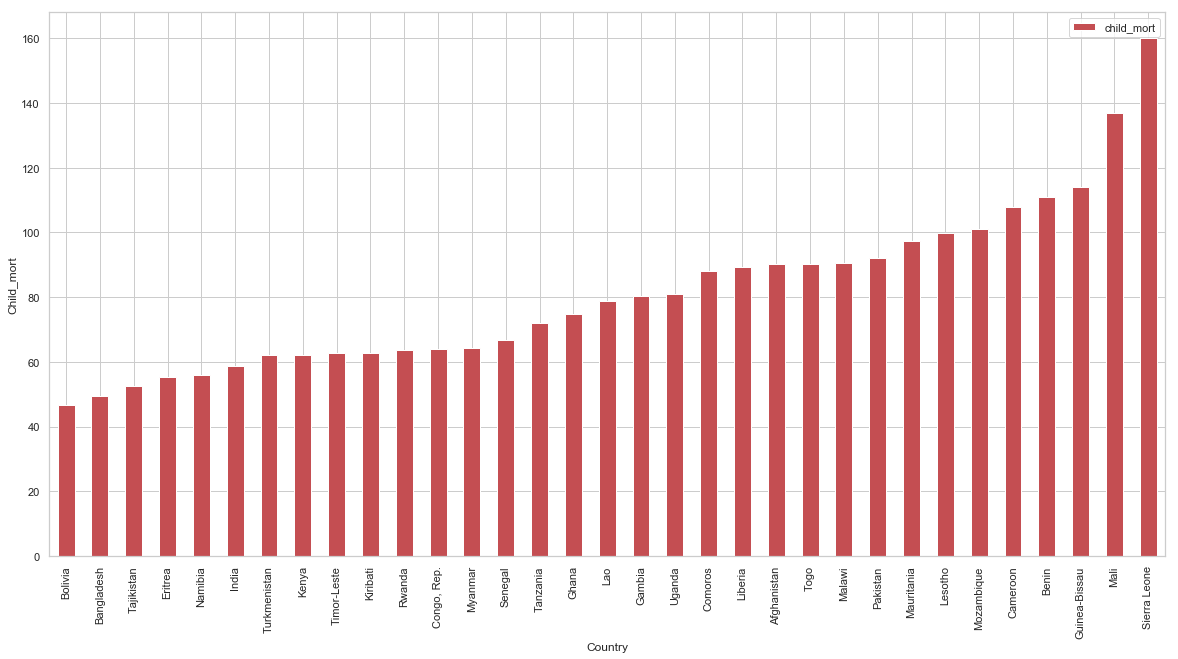

In [327]:
# Plot the under developed countries on the basis of child mort
plt.rcParams["figure.figsize"] = [20,10]
sns.set(style="whitegrid")
under_devp.plot(x="country", y="child_mort", kind ='bar',color = 'r')

plt.ylabel('Child_mort')
plt.xlabel('Country')
plt.show()

In [328]:
Developing = Developing.sort_values(by='income',ascending=True)
Developing.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
81,Moldova,17.2,638.96,190.710,1279.55,3910,11.10,69.7,1.27,1630,1
117,Tonga,17.4,440.20,179.985,2140.65,4980,3.68,69.9,3.91,3550,1
99,Samoa,18.9,1007.40,223.215,1831.95,5400,1.72,71.5,4.34,3450,0
4,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,1
43,Georgia,16.5,1036.00,298.960,1562.88,6730,8.55,72.8,1.92,2960,1


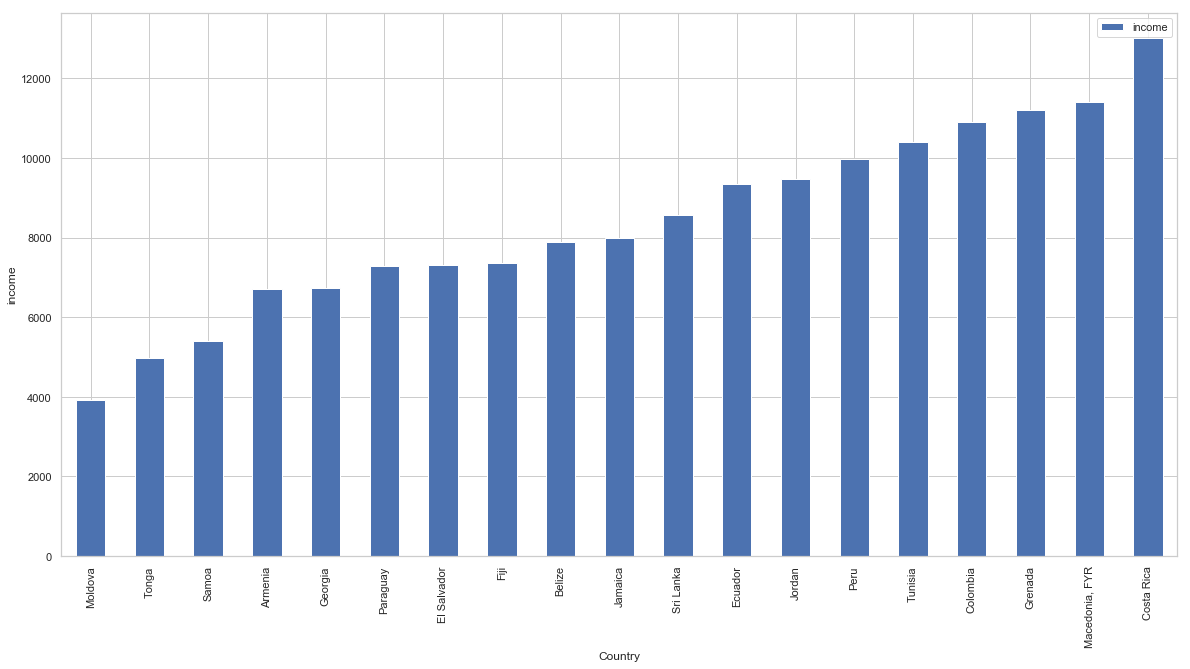

In [329]:
# Plot the under developed countries on the basis of child mort
plt.rcParams["figure.figsize"] = [20,10]
sns.set(style="whitegrid")
Developing.plot(x="country", y="income", kind ='bar',color = 'b')

plt.ylabel('income')
plt.xlabel('Country')
plt.show()

In [330]:
Developed = Developed.sort_values(by='gdpp',ascending=True)
Developed.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
57,Israel,4.6,10710.0,2334.78,10067.4,29600,1.77,81.4,3.03,30600,2
108,Spain,3.8,7828.5,2928.78,8227.6,32500,0.16,81.9,1.37,30700,0
30,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.01,79.9,1.42,30800,2
122,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600,12.50,76.5,1.87,35000,1
18,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.70,77.1,1.84,35300,2


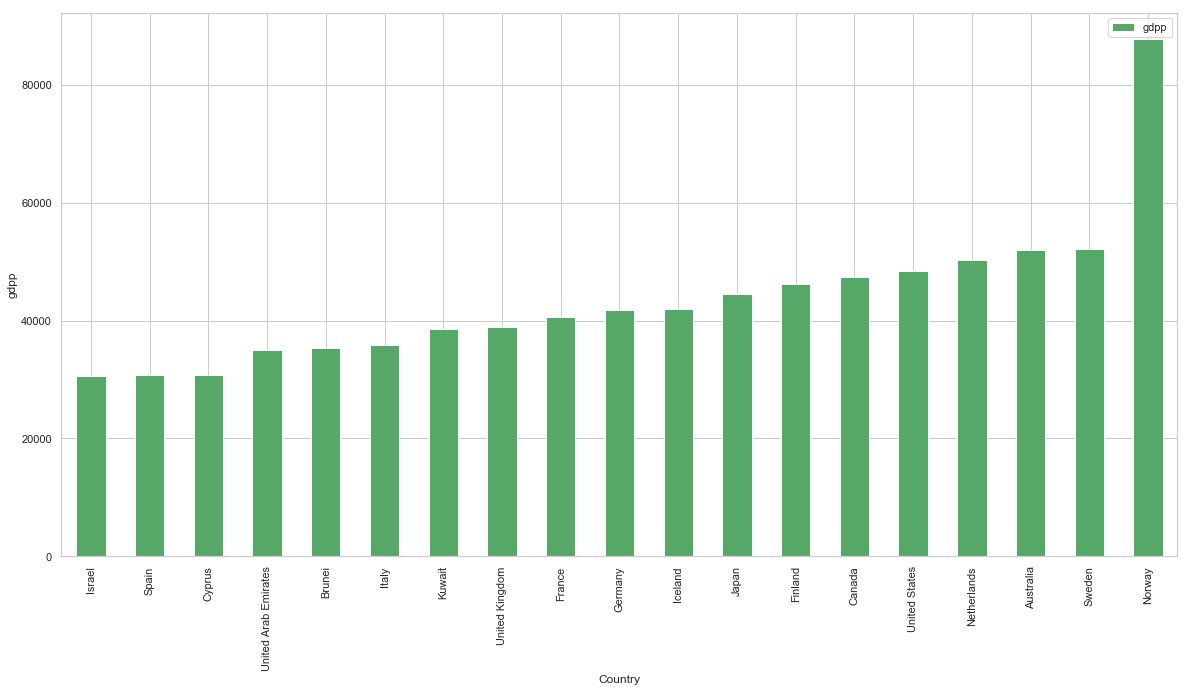

In [331]:
# Plot the under developed countries on the basis of child mort
plt.rcParams["figure.figsize"] = [20,10]
sns.set(style="whitegrid")
Developed.plot(x="country", y="gdpp", kind ='bar',color = 'g')

plt.ylabel('gdpp')
plt.xlabel('Country')
plt.show()

In [332]:
under_developed_countries = under_devp.country
Developed_countries = Developed.country
Developing_countries = Developing.country

In [333]:
under_developed_countries.count() # There are 33 countries which are in direct need in aid.

33

In [334]:
Developed_countries.count() # There are 19 countries which are developed and does not require immediate aid.

19

In [335]:
Developing_countries.count() # There are 19 countries which is developing may require aid in future for their developement.

19

-- Based on both K-means & Hirerarchial clustering analysis we will take the K - Means clustering analysis for the final decision making on direct aid of the countries to be suggested to CEO.